### 6. Практика

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

In [3]:
data = pd.read_csv('data/insurance.zip')
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print(data.shape)


(1338, 7)


In [5]:
display(data.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
display(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
#кодируем бинарные категориальные признаки
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)
data.head()


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [8]:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_test.shape[0]

268

In [21]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
round(lr.intercept_, 2)

-12390.8

In [24]:
y_train_pred = lr.predict(X_train)

print(f'R2:     {metrics.r2_score(y_train, y_train_pred):.3f}')
print(f'MAE:    {metrics.mean_absolute_error(y_train, y_train_pred):.0f}')
print(f'MAPE:   {metrics.mean_absolute_percentage_error(y_train, y_train_pred):.0%}')


R2:     0.742
MAE:    4208
MAPE:   42%


In [25]:
y_ridge_test_pred = lr.predict(X_test)

print(f'R2:     {metrics.r2_score(y_test, y_ridge_test_pred):.3f}')
print(f'MAE:    {metrics.mean_absolute_error(y_test, y_ridge_test_pred):.0f}')
print(f'MAPE:   {metrics.mean_absolute_percentage_error(y_test, y_ridge_test_pred):.0%}')


R2:     0.784
MAE:    4181
MAPE:   47%


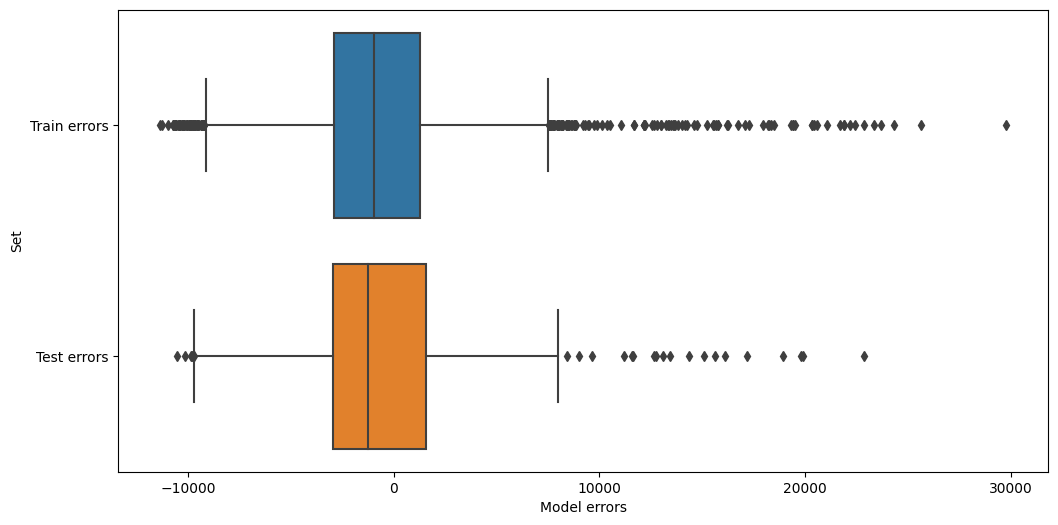

In [26]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура + координатная плоскость
#Ошибки модели на тренировочной выборке
y_errors_train = y_train - y_train_pred
#Ошибки модели на тестовой выборке
y_errors_test = y_test - y_ridge_test_pred
#Для удобства визуализации составим DataFrame из ошибок
errors_df = pd.DataFrame(
    {
        'Train errors': y_errors_train, 
        'Test errors': y_errors_test
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Set'); #название оси ординат

In [27]:
mm_scaler = preprocessing.MinMaxScaler()
mm_scaler.fit(X_train)

MinMaxScaler()

In [28]:
X_train_norm = mm_scaler.transform(X_train)
X_test_norm = mm_scaler.transform(X_test)

In [32]:
poly = preprocessing.PolynomialFeatures(2, include_bias=False)
poly.fit(X_train_norm)
X_train_norm_poly = poly.transform(X_train_norm)
X_test_norm_poly = poly.transform(X_test_norm)

In [33]:
X_train_norm_poly.shape[1]

54

In [35]:
lr.fit(X_train_norm_poly, y_train)
y_test_norm_poly = lr.predict(X_test_norm_poly)
print(f'R2:     {metrics.r2_score(y_test, y_test_norm_poly):.3f}')

R2:     0.867


In [38]:
np.round(lr.coef_, 4)

array([-6.21856627e+16,  9.09376712e+14,  1.24390697e+16, -2.38142315e+16,
        4.82714750e+14, -1.17245170e+15, -6.50296156e+14, -1.00325161e+15,
        4.33495675e+14,  8.47200000e+03,  8.12000000e+02,  9.48000000e+02,
       -1.68400000e+03,  1.36000000e+02,  6.21856627e+16,  6.21856627e+16,
        6.21856627e+16,  6.21856627e+16,  4.72628002e+14,  6.56000000e+02,
       -1.25525000e+03,  2.54750000e+02, -1.38200471e+15, -1.38200471e+15,
       -1.38200471e+15, -1.38200471e+15, -9.61087500e+03,  1.55231250e+03,
        5.48375938e+04, -1.24390697e+16, -1.24390697e+16, -1.24390697e+16,
       -1.24390697e+16, -2.08387500e+03, -2.25200000e+03,  2.38142315e+16,
        2.38142315e+16,  2.38142315e+16,  2.38142315e+16,  1.56487322e+14,
       -6.39202072e+14, -6.39202072e+14, -6.39202072e+14, -6.39202072e+14,
       -1.58027173e+13,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -5.37958265e+14,  0.00000000e+00,  0.00000000e+00, -1.85002812e+14,
        0.00000000e+00, -

In [39]:
ridge_lr_poly = linear_model.Lasso(max_iter=2000)
ridge_lr_poly.fit(X_train_norm_poly, y_train)

y_ridge_test_pred = ridge_lr_poly.predict(X_test_norm_poly)

print(f'R2:     {metrics.r2_score(y_test, y_ridge_test_pred):.3f}')
print(f'MAE:    {metrics.mean_absolute_error(y_test, y_ridge_test_pred):.0f}')
print(
    f'MAPE:   {metrics.mean_absolute_percentage_error(y_test, y_ridge_test_pred):.0%}')


R2:     0.867
MAE:    2719
MAPE:   30%


In [40]:
ridge_lr_poly = linear_model.Ridge()
ridge_lr_poly.fit(X_train_norm_poly, y_train)

y_ridge_test_pred = ridge_lr_poly.predict(X_test_norm_poly)

print(f'R2:     {metrics.r2_score(y_test, y_ridge_test_pred):.3f}')
print(f'MAE:    {metrics.mean_absolute_error(y_test, y_ridge_test_pred):.0f}')
print(
    f'MAPE:   {metrics.mean_absolute_percentage_error(y_test, y_ridge_test_pred):.0%}')

R2:     0.863
MAE:    2861
MAPE:   31%
